# 0 | Import Libraries and load data

In [240]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn import metrics
from yellowbrick.classifier import ConfusionMatrix
import pickle


# change pandas display setings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [209]:
#loading data 
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')

# 1 | Data Preprocessing

In [210]:
data_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [211]:
data_test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [212]:
data_test = data_test.drop(columns=["id"])
data_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [213]:
print("Training Data (rows,cols): ",data_train.shape)
print("Testing Data (rows,cols): ",data_test.shape)

Training Data (rows,cols):  (2000, 21)
Testing Data (rows,cols):  (1000, 20)


The dataset have 20 features and one target variable (price_range)

In [214]:
data_train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,1995.000000,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,9.915789,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,6.058469,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [215]:
# compare train and test mean for each feature

features = data_test.columns.to_list()

comparison = pd.DataFrame({'features':features,
                            'train_mean':data_train.drop(columns=['price_range']).mean().values.tolist(),
                            'test_mean':data_test.mean().values.tolist() })
comparison

,features,train_mean,test_mean
0,battery_power,1238.518500,1248.5100
1,blue,0.495000,0.5160
2,clock_speed,1.522250,1.5409
3,dual_sim,0.509500,0.5170
4,fc,4.310276,4.5930
5,four_g,0.521303,0.4870
6,int_memory,32.048120,33.6520
7,m_dep,0.502256,0.5175
8,mobile_wt,140.266533,139.5110
9,n_cores,4.518036,4.3280


The mean of the train and the test dataset are close to each other which means the train and test data from the same disribution.

In [216]:
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [217]:
data_test.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

There's no null values in the test datset but there's some colums in the train dataset have null values needs to be filled.


In [218]:
# Fill null values in training dataset with the median value of the column
 
data_train.fillna(data_train.median(), inplace=True)
data_train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [219]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   float64
 5   four_g         2000 non-null   float64
 6   int_memory     2000 non-null   float64
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   float64
 9   n_cores        2000 non-null   float64
 10  pc             2000 non-null   float64
 11  px_height      2000 non-null   float64
 12  px_width       2000 non-null   float64
 13  ram            2000 non-null   float64
 14  sc_h           2000 non-null   float64
 15  sc_w           2000 non-null   float64
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [220]:
data_train.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1135
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

We have (8) categoriical features and (12) numerical features

In [221]:
categorical_features=[col for col in data_train.columns if data_train[col].nunique()<=4]
numerical_variables=[col for col in data_train.columns if data_train[col].nunique()>4]

print('Categorical:' ,categorical_features)
print('Numerical:', numerical_variables)

Categorical: ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']
Numerical: ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']


In [222]:
data_train.min()

battery_power    501.0
blue               0.0
clock_speed        0.5
dual_sim           0.0
fc                 0.0
four_g             0.0
int_memory         2.0
m_dep              0.1
mobile_wt         80.0
n_cores            1.0
pc                 0.0
px_height          0.0
px_width         500.0
ram              256.0
sc_h               5.0
sc_w               0.0
talk_time          2.0
three_g            0.0
touch_screen       0.0
wifi               0.0
price_range        0.0
dtype: float64

px_height and sc_w cannot be zero, a device with this specs can't be existed


In [223]:
data_train["px_height"].describe()

count    2000.000000
mean      644.490500
std       442.926307
min         0.000000
25%       282.750000
50%       564.000000
75%       946.250000
max      1960.000000
Name: px_height, dtype: float64

In [224]:
data_train["sc_w"].describe()

count    2000.000000
mean        5.766000
std         4.356344
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

In [225]:

data_train = data_train[data_train['sc_w']>0]
data_train = data_train[data_train['px_height']>0]

data_train.reset_index(inplace=True)
data_train.drop('index', axis=1, inplace=True)
data_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,2.0,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,6.0,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,6.0,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,9.0,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,14.0,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,794,1,0.5,1,0.0,1.0,2.0,0.8,106.0,6.0,14.0,1222.0,1890.0,668.0,13.0,4.0,19,1,1,0,0
1815,1965,1,2.6,1,0.0,0.0,39.0,0.2,187.0,4.0,3.0,915.0,1965.0,2032.0,11.0,10.0,16,1,1,1,2
1816,1911,0,0.9,1,1.0,1.0,36.0,0.7,108.0,8.0,3.0,868.0,1632.0,3057.0,9.0,1.0,5,1,1,0,3
1817,1512,0,0.9,0,4.0,1.0,46.0,0.1,145.0,5.0,5.0,336.0,670.0,869.0,18.0,10.0,19,1,1,1,0


In [226]:
# better to inspect the correlation of price_range vs. features specifically
data_train.corr()["price_range"].sort_values(ascending = False)


price_range      1.000000
ram              0.917013
battery_power    0.193879
px_width         0.150727
px_height        0.148867
int_memory       0.050336
sc_w             0.031894
blue             0.028674
sc_h             0.024543
dual_sim         0.022761
pc               0.022068
wifi             0.020652
fc               0.017926
three_g          0.016910
four_g           0.014078
talk_time        0.010925
m_dep            0.002373
clock_speed     -0.003857
n_cores         -0.009613
mobile_wt       -0.024240
touch_screen    -0.033778
Name: price_range, dtype: float64

The most correlated features to the price_range is [ram, battery_power, px_width, px_height]

# 2 | EDA

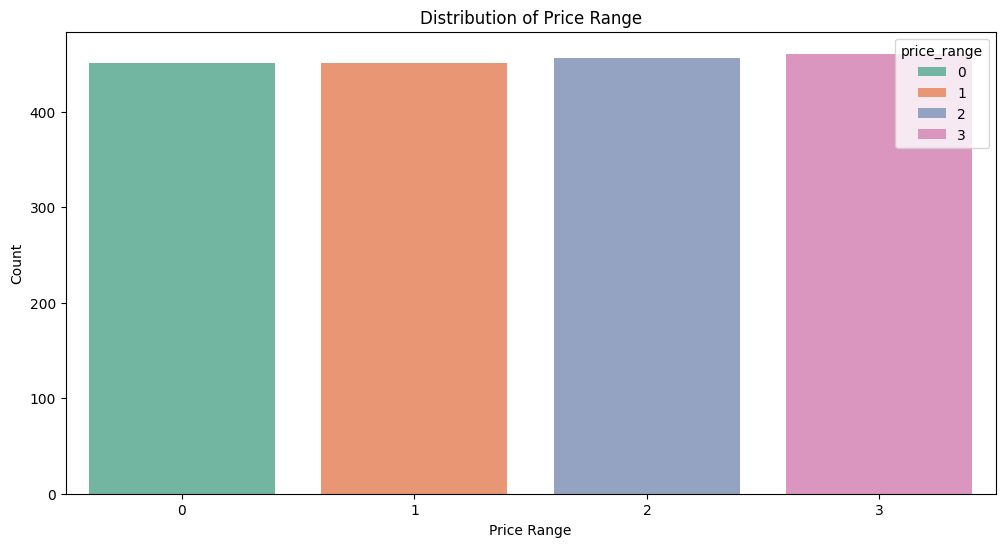

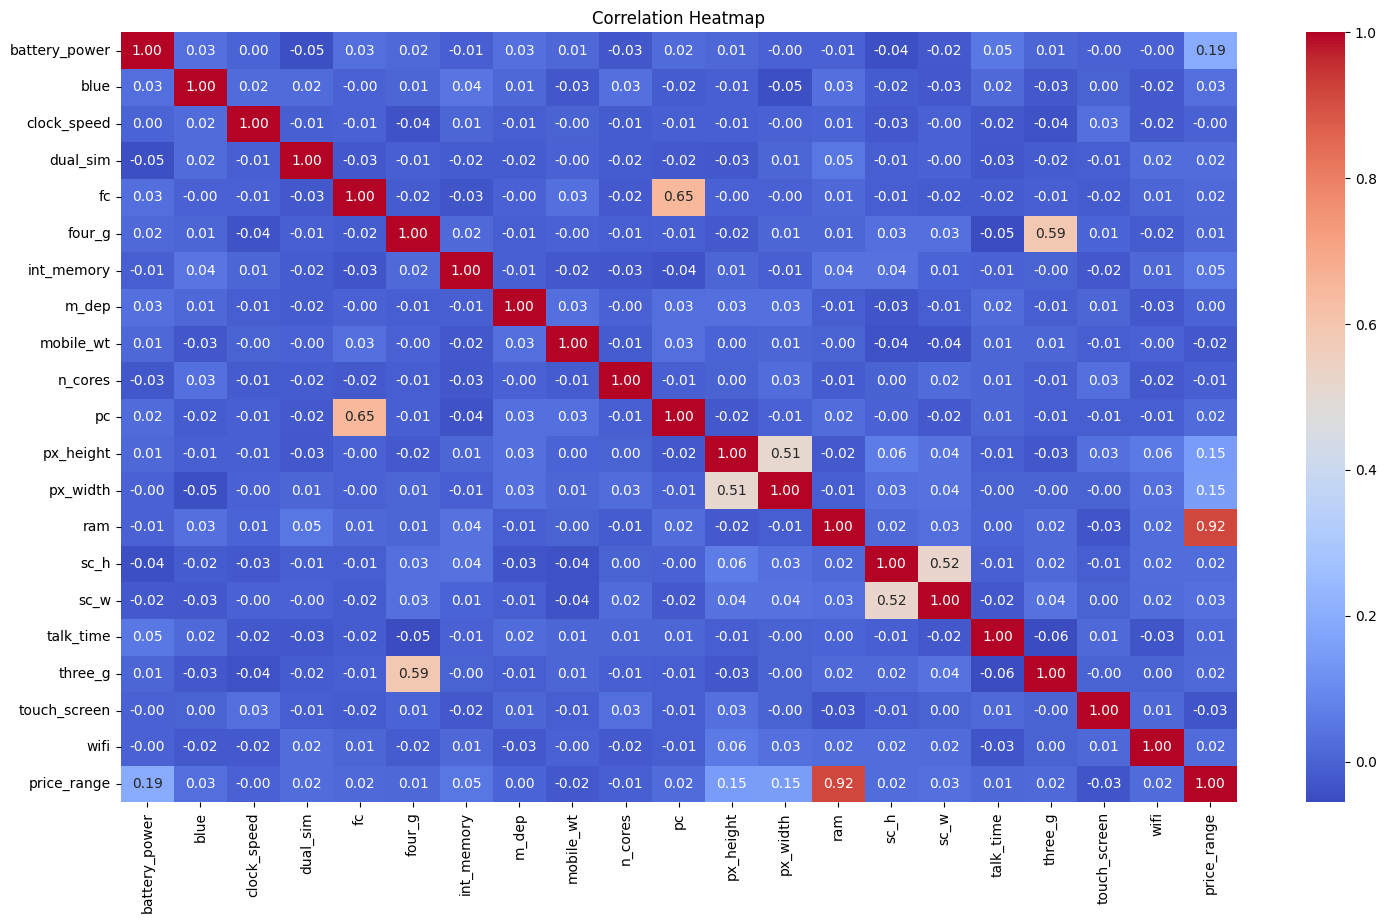

In [227]:
# Distribution of price_range
plt.figure(figsize=(12, 6))
sns.countplot(x='price_range',hue='price_range', data=data_train, palette = "Set2")
plt.title('Distribution of Price Range')
plt.xlabel('Price Range')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(18, 10))
corr_matrix = data_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Distribution of Price Range:
- The price_range distribution is fairly balanced across the four categories, which is ideal for classification tasks.

Correlation Heatmap:
- Strong positive correlations are observed between px_height and px_width, and between ram and price_range.
- Other notable correlation is battery_power with price_range

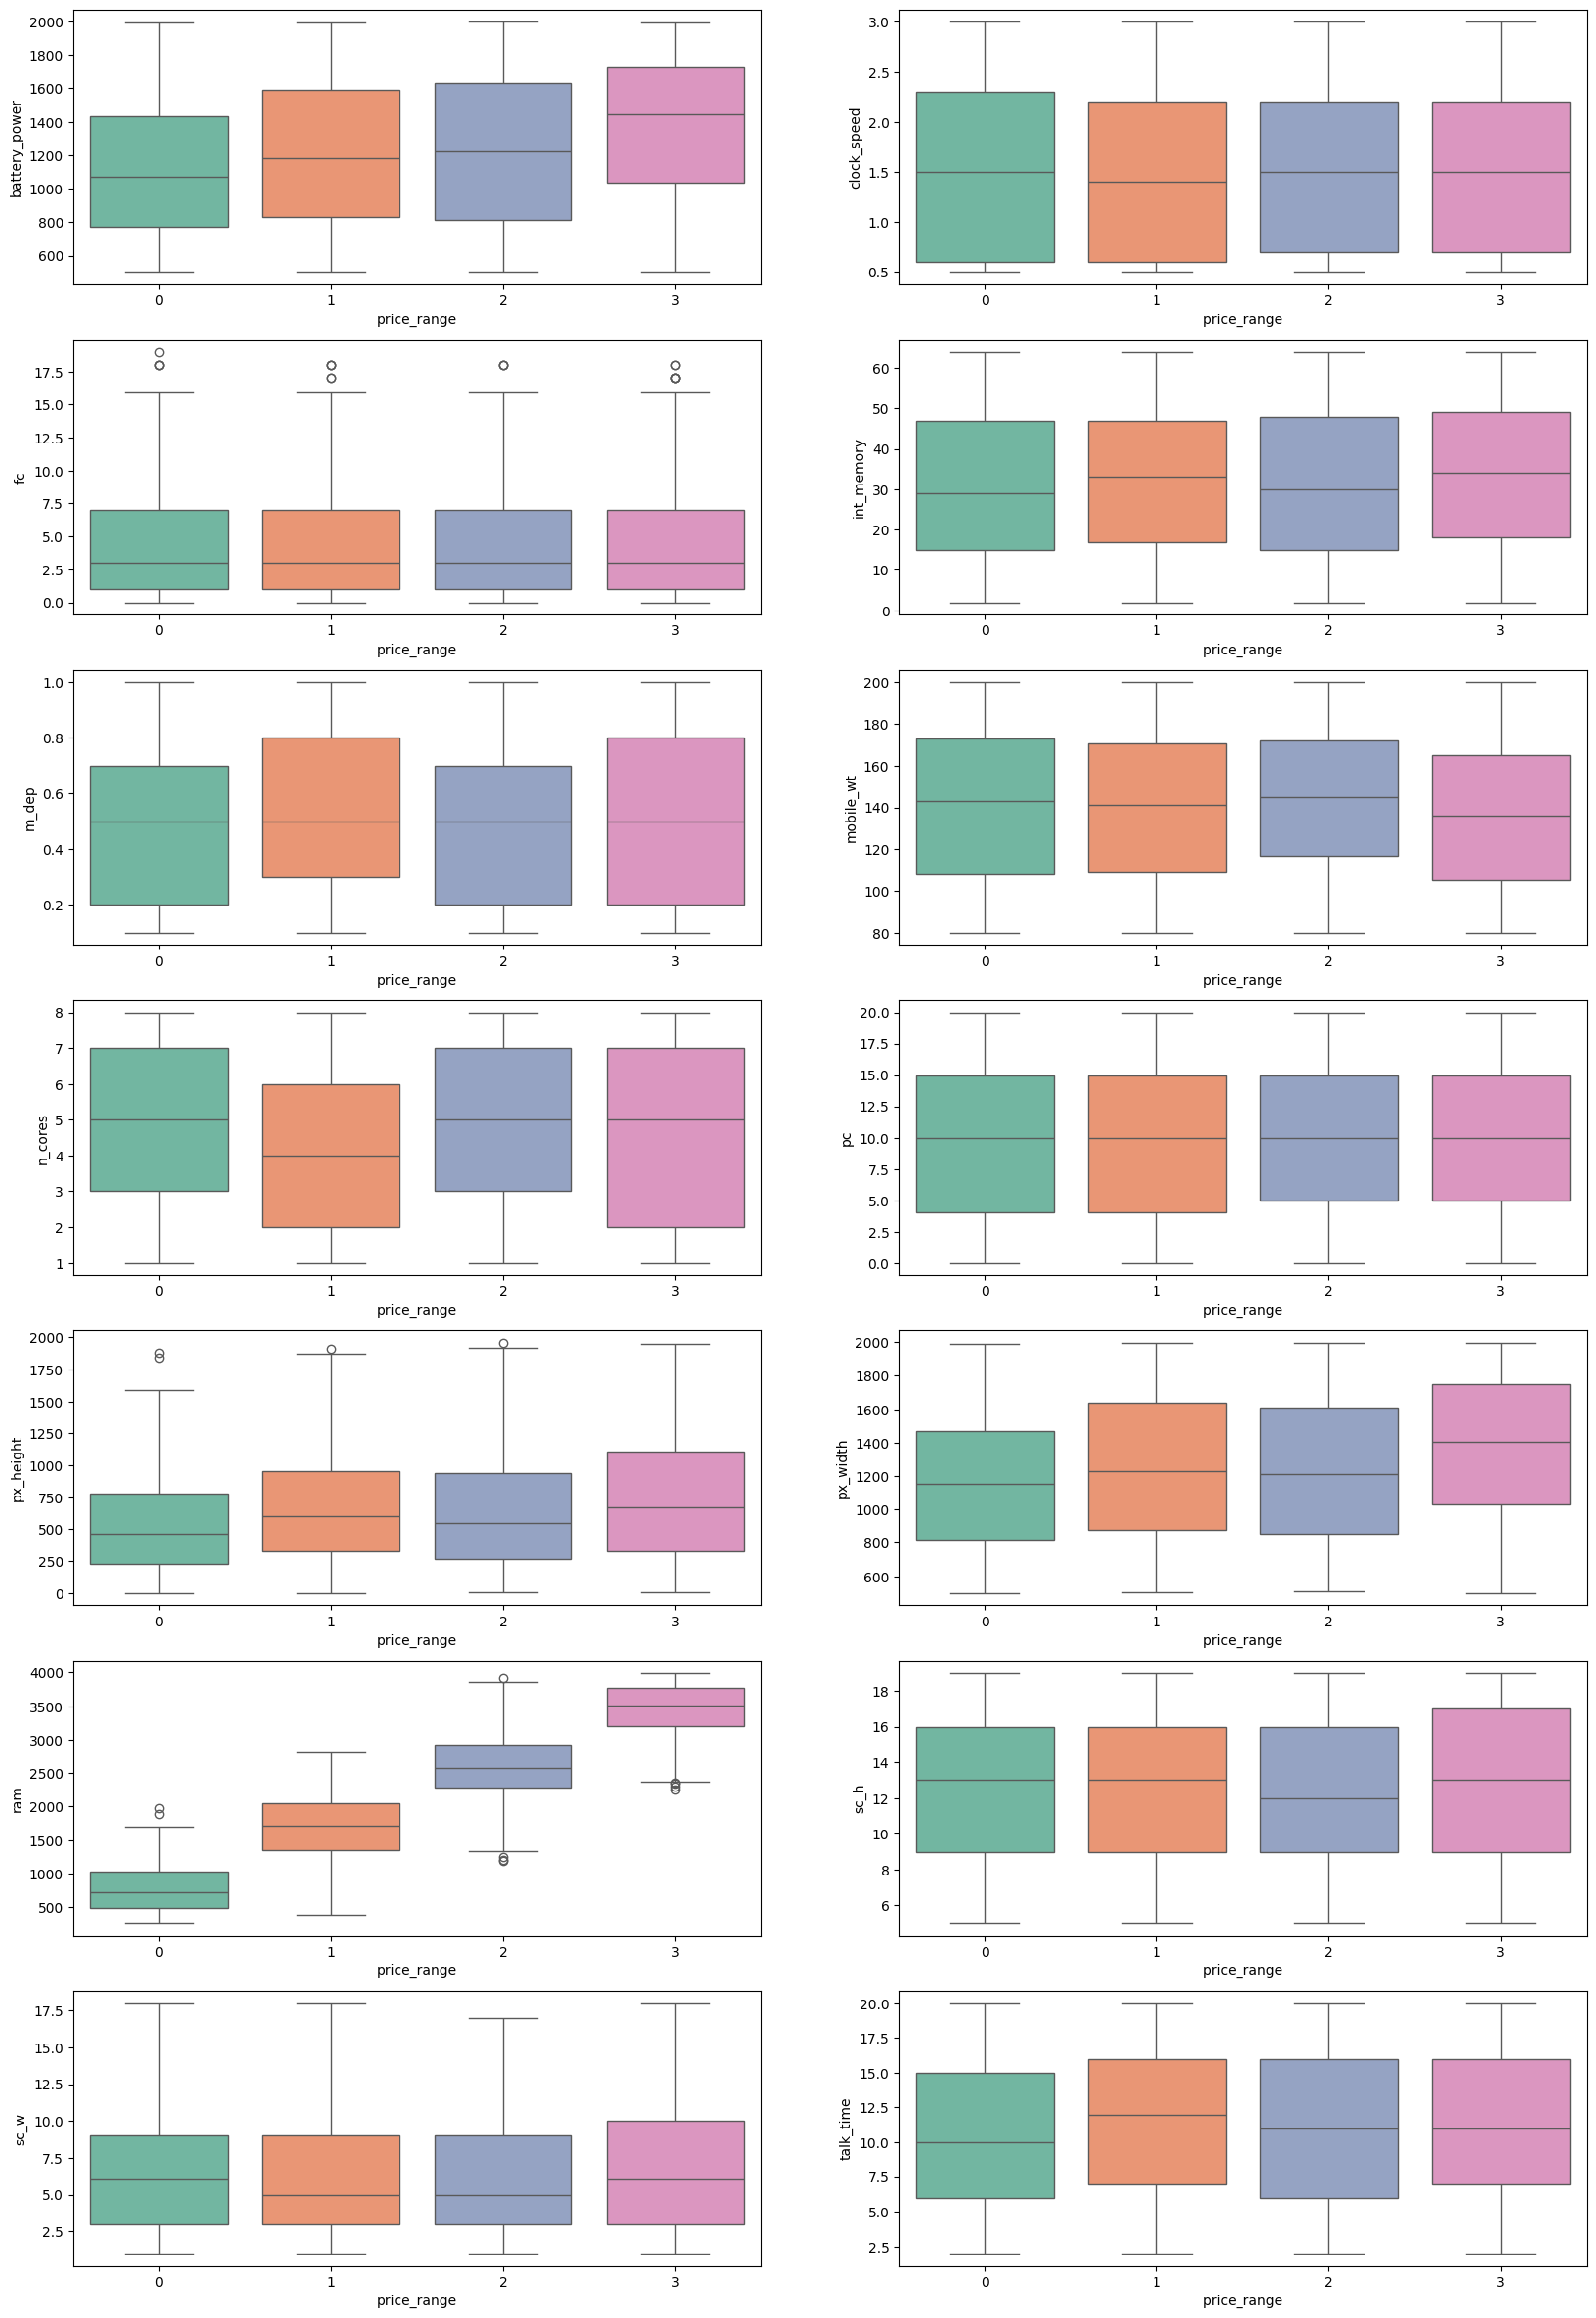

In [228]:
fig=plt.figure(figsize=(20,30))
for i,col in enumerate(numerical_variables):
    ax=fig.add_subplot(7,2,i+1)
    sns.boxplot(y=data_train[col],x=data_train['price_range'], hue=data_train['price_range'], palette = "Set2")
    plt.legend([],[], frameon=False)


- Feature vs. Target Insights

    - Battery Power vs. Price Range:
        - Higher battery power generally correspond to higher price ranges , indicating that more expensive devices tend to have better battery performance.

    - RAM vs. Price Range:
        - There is a clear increase in RAM as the price range increases. This suggests that more expensive devices have more RAM.

    - Pixel Height and Width vs. Price Range:
        - Both pixel height and width show an increasing trend with higher price ranges, indicating that more expensive devices tend to have higher screen resolutions.    
    
    - Screen Height and Width:
        - Higher price ranges have more screen height and width, indicating that the more expensice devices has larger displays.



# 3 | Model Training


In [229]:
# Split the data into training and validation sets
X = data_train.drop('price_range', axis=1)
y = data_train['price_range']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [230]:
# Initialize and train the Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = rf_clf.predict(X_val)

# Evaluate the model
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)

print(f'Confusion Matrix : \n\n{conf_matrix}\n')
print(f'Classification Report : \n\n{class_report}')
print('f1 score is:', metrics.f1_score(y_val, y_pred,average="macro"))

Confusion Matrix : 

[[75  5  0  0]
 [ 9 83  4  0]
 [ 0  8 78 12]
 [ 0  0  7 83]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        80
           1       0.86      0.86      0.86        96
           2       0.88      0.80      0.83        98
           3       0.87      0.92      0.90        90

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

f1 score is: 0.8776848439756438


In [231]:
# Initialize and train the Support Vector MAchine Classifier
svm_clf = SVC(random_state=42)

svm_clf.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_svm = svm_clf.predict(X_val)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_val, y_pred_svm)
class_report_svm = classification_report(y_val, y_pred_svm)

print(f'Confusion Matrix : \n\n{conf_matrix}\n')
print(f'Classification Report : \n\n{class_report}')
print('f1 score is:', metrics.f1_score(y_val, y_pred_svm,average="macro"))

Confusion Matrix : 

[[75  5  0  0]
 [ 9 83  4  0]
 [ 0  8 78 12]
 [ 0  0  7 83]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        80
           1       0.86      0.86      0.86        96
           2       0.88      0.80      0.83        98
           3       0.87      0.92      0.90        90

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

f1 score is: 0.9403082754142343


SVM have higher score than the RF model, so we will try to optimize the SVM to get higher accuracy.

# 4 | Model Optimization

In [232]:
# define parameters to be tuned using GridSearchCV
kernel=["linear","rbf"]
gamma=["auto",0.01,0.001,0.0001,1]
decision_function_shape=["ovo","ovr"]

In [233]:
# using GridSearchCV to tune parameters
svm=SVC(random_state=42)
grid_svm=GridSearchCV(estimator=svm,cv=5,  param_grid=dict(kernel=kernel, gamma=gamma, decision_function_shape=decision_function_shape))
grid_svm.fit(X_train,y_train)

print("best score: ", grid_svm.best_score_)
print("best param: ", grid_svm.best_params_)

best score:  0.9649484536082473
best param:  {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear'}


In [234]:
# tune the C parameter
test_score = []
C = np.arange(0.1, 1, 0.02)

for i in C:
    svm = SVC(random_state = 42, kernel = 'linear', decision_function_shape = 'ovo', C = i)
    svm.fit(X_train, y_train)
    test_score.append(svm.score(X_val, y_val))

C_best = C[test_score.index(max(test_score))]
print(f'Best C value is {C_best}')

Best C value is 0.1


In [237]:
svm_final=SVC(C=C_best,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=42)
svm_final.fit(X_train,y_train)
y_pred_final = svm_final.predict(X_val)

# Evaluate the model
conf_matrix_svm = confusion_matrix(y_val, y_pred_final)
class_report_svm = classification_report(y_val, y_pred_final)

print(f'Confusion Matrix : \n\n{conf_matrix}\n')
print(f'Classification Report : \n\n{class_report}')
print('f1 score is:', metrics.f1_score(y_val, y_pred_final,average="macro"))

Confusion Matrix : 

[[75  5  0  0]
 [ 9 83  4  0]
 [ 0  8 78 12]
 [ 0  0  7 83]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        80
           1       0.86      0.86      0.86        96
           2       0.88      0.80      0.83        98
           3       0.87      0.92      0.90        90

    accuracy                           0.88       364
   macro avg       0.88      0.88      0.88       364
weighted avg       0.88      0.88      0.88       364

f1 score is: 0.983425113081158


c:\Users\maher\OneDrive\Desktop\maidcc\AI\.conda\lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



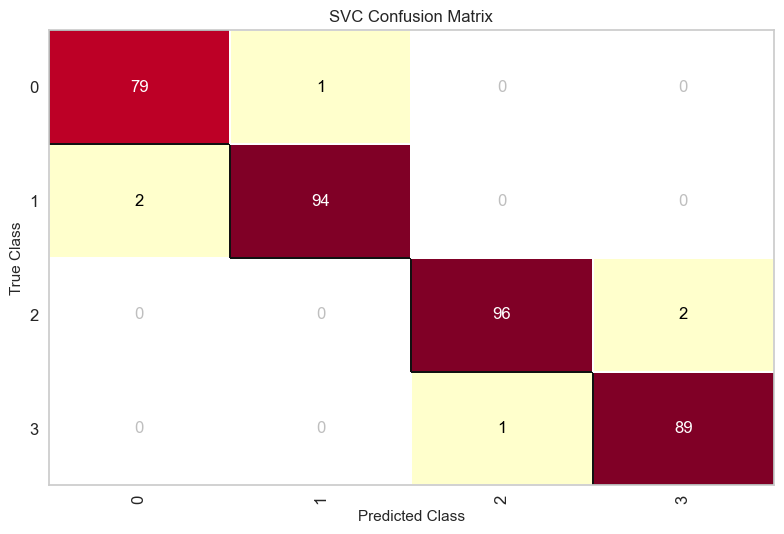

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [238]:
cm = ConfusionMatrix(svm_final, classes=[0,1,2,3])
cm.fit(X_train, y_train)

cm.score(X_val, y_val)

cm.poof()

SVM Predicted (358) sample correctly and (6) wrongly.

# Best Model

    - SVM: 
        - f1-score: .983
        - best parameters: {'decision_function_shape': 'ovo', 'gamma': 'auto', 'kernel': 'linear', 'C':0.1}  

In [241]:
# Save the model to be used in production
with open('saved_model/mobile_classifer_SVC.pkl', 'wb') as file:
    pickle.dump(svm_final, file)